BOW Accuracy: 0.65
TF-IDF Accuracy: 0.61

Classification Report (TF-IDF Model):
              precision    recall  f1-score   support

    negative       0.78      0.34      0.47      1572
     neutral       0.52      0.86      0.65      2236
    positive       0.78      0.52      0.63      1688

    accuracy                           0.61      5496
   macro avg       0.69      0.57      0.58      5496
weighted avg       0.67      0.61      0.59      5496



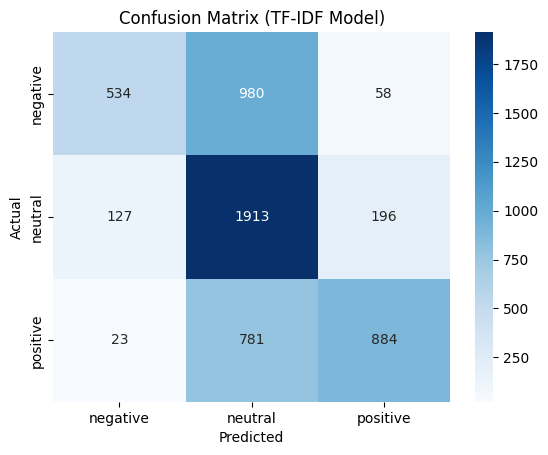

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path ='TweetSentimentAnalysis.csv'
tweet_data = pd.read_csv(file_path,encoding='cp1252')
# Drop rows with NaN values in 'text' column
tweet_data_cleaned = tweet_data.dropna(subset=['text'])

# Separate features and target variable
X_cleaned = tweet_data_cleaned['text']
y_cleaned = tweet_data_cleaned['sentiment']

# Split the data into training and test sets
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Function to perform BOW, TF-IDF, and Sentiment Analysis
def perform_text_analysis(X_train, X_test, y_train, y_test):
    # Bag of Words (BOW) Transformation
    bow_vectorizer = CountVectorizer()
    X_train_bow = bow_vectorizer.fit_transform(X_train)
    X_test_bow = bow_vectorizer.transform(X_test)

    # Train and Evaluate Model using BOW
    model_bow = MultinomialNB()
    model_bow.fit(X_train_bow, y_train)
    y_pred_bow = model_bow.predict(X_test_bow)
    accuracy_bow = accuracy_score(y_test, y_pred_bow)

    # TF-IDF Transformation
    tfidf_vectorizer = TfidfVectorizer()
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    # Train and Evaluate Model using TF-IDF
    model_tfidf = MultinomialNB()
    model_tfidf.fit(X_train_tfidf, y_train)
    y_pred_tfidf = model_tfidf.predict(X_test_tfidf)
    accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

    # Output BOW and TF-IDF accuracies
    print(f"BOW Accuracy: {accuracy_bow:.2f}")
    print(f"TF-IDF Accuracy: {accuracy_tfidf:.2f}")

    # Sentiment Analysis Performance Report
    print("\nClassification Report (TF-IDF Model):")
    print(classification_report(y_test, y_pred_tfidf))

    # Plot Confusion Matrix for TF-IDF Model
    cm = confusion_matrix(y_test, y_pred_tfidf, labels=model_tfidf.classes_)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model_tfidf.classes_, yticklabels=model_tfidf.classes_)
    plt.title("Confusion Matrix (TF-IDF Model)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Perform text analysis on the dataset
perform_text_analysis(X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned)
